You are exploring the wilderness of _Mushroomia_, a land populated by a plethora of diverse fauna and flora. In particular, _Mushroomia_ is known for its unparalleled variety in mushrooms. However, not all the mushrooms in _Mushroomia_ are edible. As you make your way through _Mushroomia_, you would like to know which mushrooms are edible, in order to forage for supplies for your daily mushroom soup.

You have access to:
* _Shroomster Pro Max <sup>TM</sup>_ - a state of the art data collection device, developed by _Mushroomia_, that allows you to collect various data points about any mushroom you encounter in the wild
* _The National Archives on Mushrooms_ - a dataset collected over the years by the government of _Mushroomia_

To address this problem, you decide to use the skills you learnt in CSM148 and train machine learning models on the _The National Archives on Mushrooms_ in order to use your _Shroomster Pro Max <sup>TM</sup>_ to determine whether the mushrooms you encounter on your adventure can be added to your daily mushroom soup.  

This project will be more unstructured than the previous two projects in order to allow you to experience how data science problems are solved in practice. There are two parts to this project: a Jupyter Notebook with your code (where you explore, visualize, process your data and train machine learning models) and a report (where you explain the various choices you make in your implementation and analyze the final performance of your models).

# 1. Loading and Viewing Data



In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import *
import numpy as np # linear algebra
import matplotlib.pyplot as plt # this is used for the plot the graph
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold
from pandas.plotting import scatter_matrix

train_df = pd.read_csv("mushroom_train.csv", delimiter = ";")
test_df = pd.read_csv("mushroom_test.csv", delimiter = ";")
train_df = train_df.sample(frac = 1,random_state = 42)
test_df = test_df.sample(frac = 1,random_state = 42)
 #note delimitter for this file is semi-colon (;) not comma

In [2]:
train_df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
21982,e,3.91,x,NaN,y,f,a,c,y,4.84,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
12387,e,1.58,x,s,y,f,d,NaN,w,6.05,...,NaN,t,y,NaN,NaN,f,f,NaN,h,a
16701,e,7.56,f,t,o,f,s,NaN,y,8.21,...,NaN,i,o,NaN,NaN,f,f,NaN,d,a
28593,p,6.53,s,d,e,t,d,c,y,5.33,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,u
44850,p,3.83,b,y,n,f,NaN,c,g,5.60,...,s,s,w,NaN,NaN,f,f,NaN,d,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,p,2.37,x,g,n,f,a,NaN,p,7.45,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
44732,p,8.00,b,y,w,f,NaN,NaN,p,12.99,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
38158,p,7.68,x,e,n,f,a,NaN,n,11.95,...,s,NaN,n,NaN,n,f,f,NaN,h,a
860,p,12.28,f,NaN,n,f,e,NaN,w,10.79,...,NaN,NaN,w,u,w,t,g,NaN,d,u


In [3]:
test_df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
33,p,2.88,b,NaN,g,f,a,NaN,n,9.26,...,NaN,NaN,n,NaN,w,f,f,k,g,a
7233,e,3.22,s,NaN,y,f,f,f,f,6.36,...,NaN,NaN,o,NaN,NaN,f,f,NaN,d,a
4582,e,6.46,x,NaN,g,t,p,NaN,g,12.58,...,NaN,y,w,NaN,NaN,f,f,NaN,d,a
5981,p,9.35,s,t,n,t,d,c,n,5.63,...,NaN,NaN,n,NaN,NaN,f,f,NaN,h,a
3272,p,9.54,x,NaN,n,f,p,NaN,p,11.09,...,c,NaN,n,NaN,NaN,f,f,p,d,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,p,10.67,x,t,r,t,d,c,n,6.01,...,NaN,NaN,n,NaN,NaN,f,f,NaN,h,a
5191,e,9.43,x,h,n,t,p,NaN,y,8.09,...,NaN,NaN,n,NaN,w,t,p,NaN,d,a
5390,e,8.98,x,h,n,f,p,d,y,7.42,...,NaN,s,n,NaN,NaN,f,f,NaN,d,u
860,e,17.05,x,t,n,f,p,NaN,w,19.89,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a


# 2. Splitting Data into Features and Labels

In [4]:
# Only keep features that shroomster can detect!
train_features = train_df.drop("class",axis = 1)
train_labels = train_df["class"]
test_features = test_df.drop("class",axis = 1)
test_labels = test_df["class"]

# 3. Data Exploration and Visualization

In [5]:
# Hint: We have done this in both project 1 & 2

%matplotlib inline
import matplotlib.pyplot as plt #plotting package
train_df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
21982,e,3.91,x,NaN,y,f,a,c,y,4.84,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
12387,e,1.58,x,s,y,f,d,NaN,w,6.05,...,NaN,t,y,NaN,NaN,f,f,NaN,h,a
16701,e,7.56,f,t,o,f,s,NaN,y,8.21,...,NaN,i,o,NaN,NaN,f,f,NaN,d,a
28593,p,6.53,s,d,e,t,d,c,y,5.33,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,u
44850,p,3.83,b,y,n,f,NaN,c,g,5.60,...,s,s,w,NaN,NaN,f,f,NaN,d,a


In [6]:
train_df.iloc[1]

class                      e
cap-diameter            1.58
cap-shape                  x
cap-surface                s
cap-color                  y
does-bruise-or-bleed       f
gill-attachment            d
gill-spacing             NaN
gill-color                 w
stem-height             6.05
stem-width              2.25
stem-root                NaN
stem-surface               t
stem-color                 y
veil-type                NaN
veil-color               NaN
has-ring                   f
ring-type                  f
spore-print-color        NaN
habitat                    h
season                     a
Name: 12387, dtype: object

In [7]:
train_df.describe()

,cap-diameter,stem-height,stem-width
count,50213.000000,50213.000000,50213.000000
mean,6.245186,6.600561,10.763191
std,4.542552,3.221714,7.744992
min,0.380000,1.200000,0.520000
25%,3.290000,4.680000,4.720000
50%,5.540000,5.900000,9.130000
75%,8.100000,7.600000,15.210000
max,58.890000,33.920000,58.950000


In [8]:
train_df.info

<bound method DataFrame.info of       class  cap-diameter cap-shape cap-surface cap-color  \
21982     e          3.91         x         NaN         y   
12387     e          1.58         x           s         y   
16701     e          7.56         f           t         o   
28593     p          6.53         s           d         e   
44850     p          3.83         b           y         n   
...     ...           ...       ...         ...       ...   
11284     p          2.37         x           g         n   
44732     p          8.00         b           y         w   
38158     p          7.68         x           e         n   
860       p         12.28         f         NaN         n   
15795     p          6.78         x           s         n   

      does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
21982                    f               a            c          y   
12387                    f               d          NaN          w   
16701                    

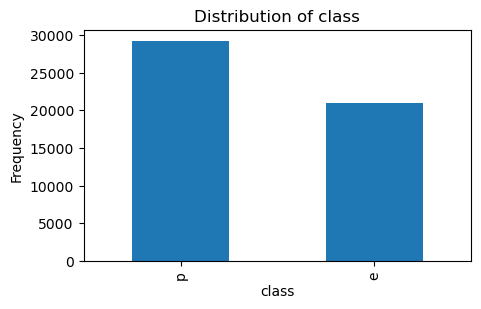

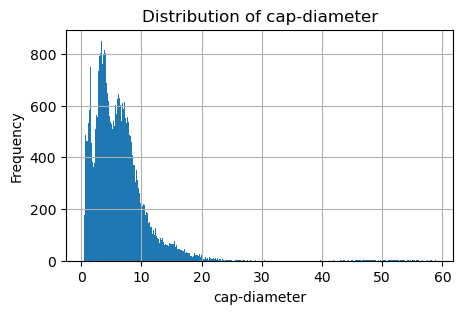

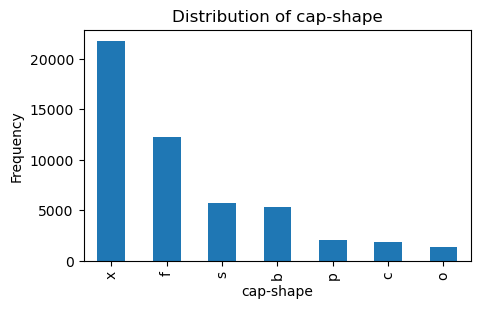

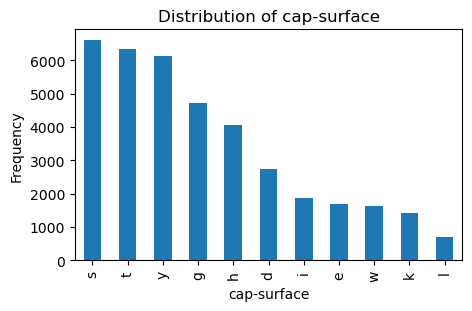

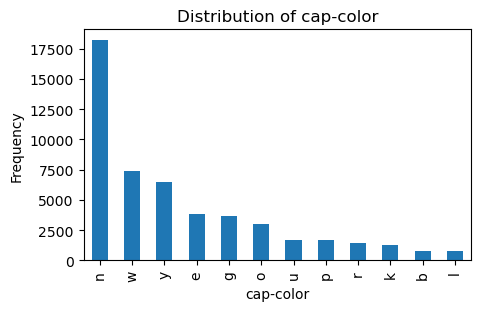

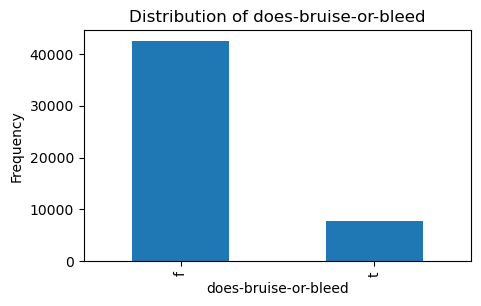

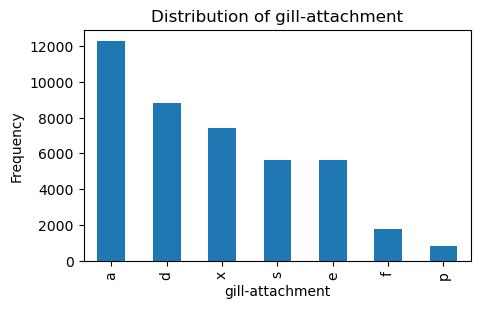

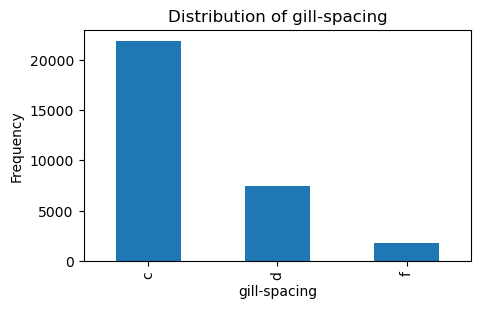

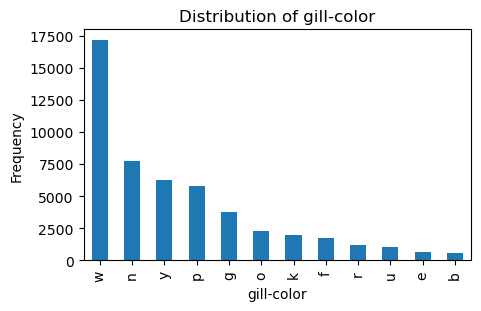

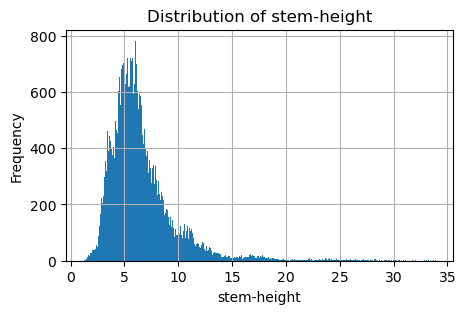

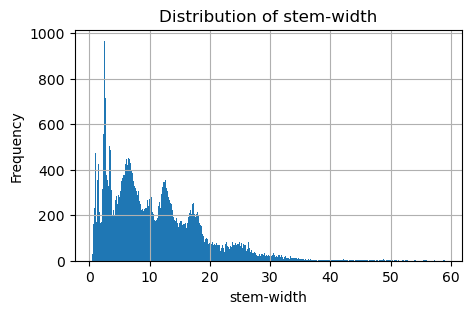

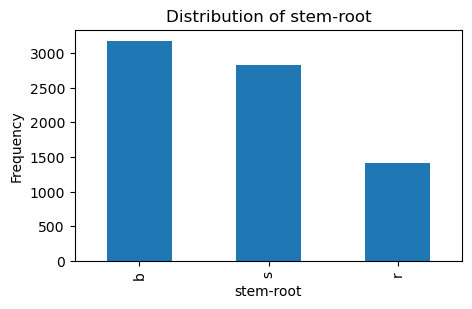

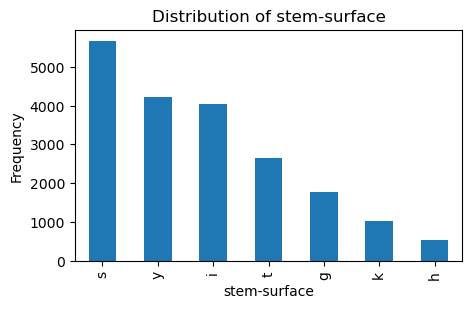

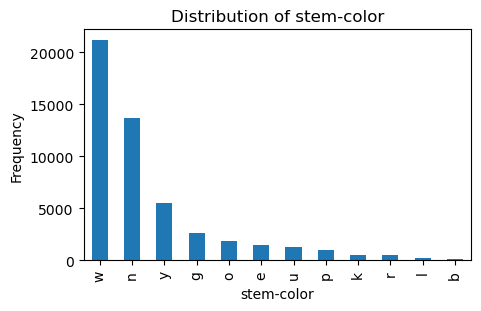

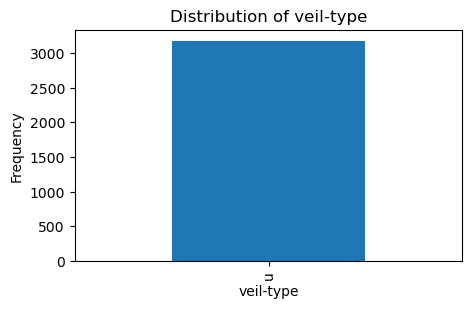

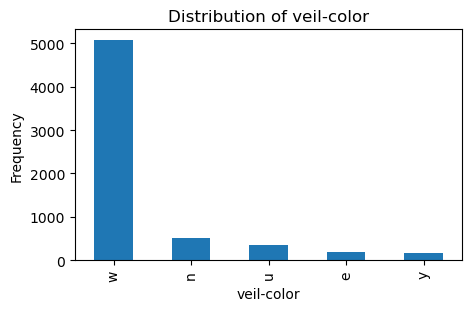

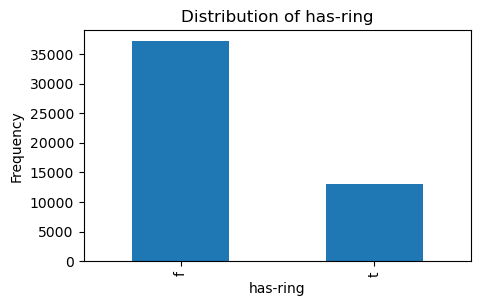

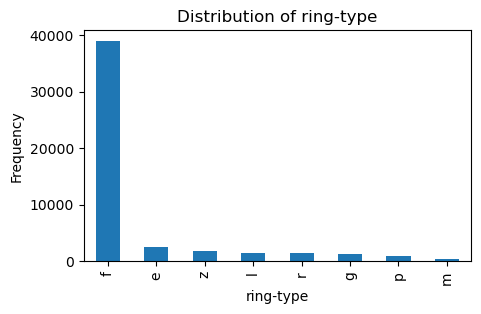

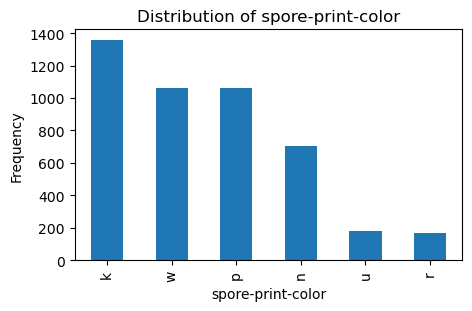

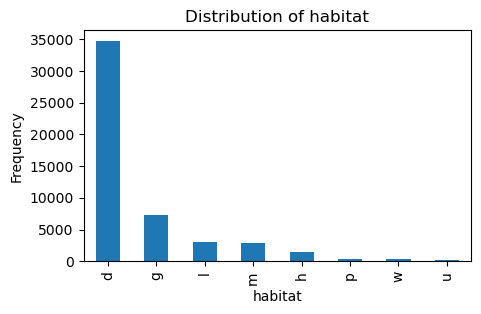

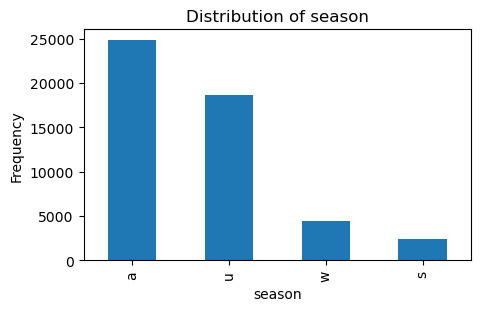

In [9]:
for name in train_df.columns:
    if train_df[name].dtype == 'O':
        train_df[name].value_counts().plot(kind = 'bar',figsize = (5,3))
        plt.xlabel(name)
        plt.ylabel("Frequency")
        plt.title("Distribution of " + name)
        plt.show()
    else:
        train_df[name].hist(bins = 500, figsize = (5,3))
        plt.xlabel(name)
        plt.ylabel("Frequency")
        plt.title("Distribution of " + name)
        plt.show()
        
    

In [10]:
train_df.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             12298
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          7766
gill-spacing            19149
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               42800
stem-surface            30301
stem-color                  0
veil-type               47036
veil-color              43916
has-ring                    0
ring-type                1765
spore-print-color       45681
habitat                     0
season                      0
dtype: int64

In [11]:
test_df.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface              1822
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          2118
gill-spacing             5914
gill-color                  0
stem-height                 0
stem-width                  0
stem-root                8738
stem-surface             7823
stem-color                  0
veil-type               10856
veil-color               9740
has-ring                    0
ring-type                 706
spore-print-color        9034
habitat                     0
season                      0
dtype: int64

cap-surface, gill-attachment, gill-spacing, stem-root, stem-surface, veil-type, veil-color, ring-type, spore-print-color contains null values. Columns that contain null values should be dropped.

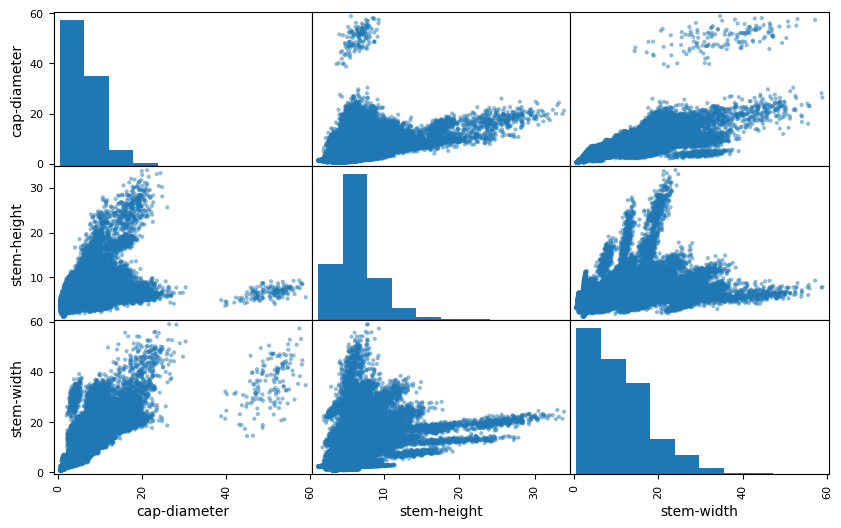

In [12]:

attributes = []
for name in train_df.columns:
    if train_df[name].dtype != 'O':
        attributes.append(name)

scatter_matrix(train_df[attributes], figsize=(10, 6))
plt.show()

In [13]:
print("Number of edible mushroom is",sum(train_df["class"] == 'e'), "in training set")
print("Number of posionous mushroom is",sum(train_df["class"] == 'p'), "in training set")
print("Number of edible mushroom is",sum(test_df["class"] == 'e')," in test set")
print("Number of posionous mushroom is",sum(test_df["class"] == 'p')," in test set") # no class imbalance

Number of edible mushroom is 20971 in training set
Number of posionous mushroom is 29242 in training set
Number of edible mushroom is 6210  in test set
Number of posionous mushroom is 4646  in test set


In [14]:
train_df.corr()

,cap-diameter,stem-height,stem-width
cap-diameter,1.000000,0.464897,0.778005
stem-height,0.464897,1.000000,0.360779
stem-width,0.778005,0.360779,1.000000


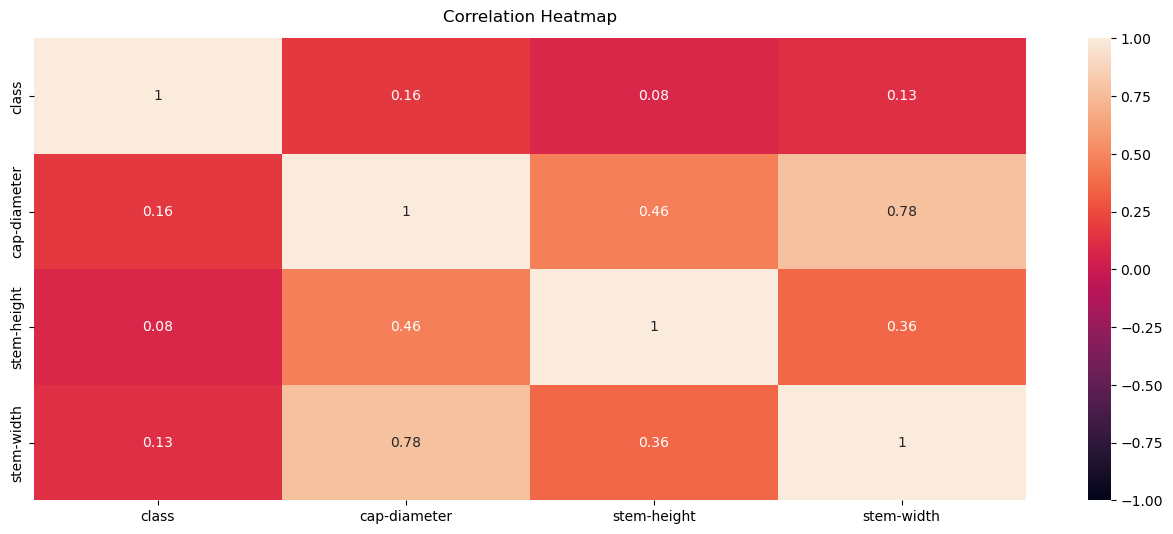

In [15]:


train_df_v2 = train_df.copy()
train_df_v2["class"] = (train_df_v2["class"] == "e")

plt.figure(figsize = (16,6))
h_map = sns.heatmap(train_df_v2.corr(),vmin=-1, vmax=1, annot=True)
h_map.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

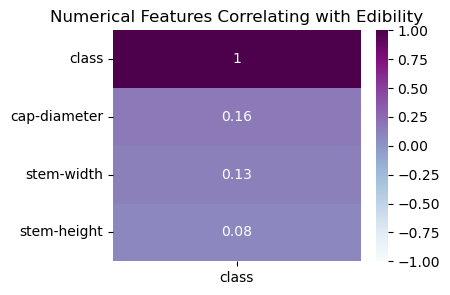

In [16]:
plt.figure(figsize = (4,3))
h_map = sns.heatmap(train_df_v2.corr()[["class"]].sort_values(by = "class",ascending=False),vmin=-1, vmax=1, annot=True,cmap ='BuPu')
h_map.set_title("Numerical Features Correlating with Edibility")
plt.show()

# 4. Data Processing

In [17]:
# Hints:
# 1. Convert the "class" column into labels: 'p' (poisonous) -> 0,  'e' (edible) -> 1 
# 2. You can drop columns if you see fit
# 3. See any imcomplete data? We learned how to deal with them in project 1.

#train_features 
#train_labels 
#test_features
#test_labels

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

In [18]:
# 1. Convert the "class" column into labels: 'p' (poisonous) -> 0,  'e' (edible) -> 1 
train_labels = (train_labels == 'e').astype("int")
test_labels = (test_labels == 'e').astype("int")

In [19]:
# 2. You can drop columns if you see fit
drop_set = []
for name in train_features.keys():
    if train_df[name].isnull().sum() != 0:
        drop_set.append(name)
print("Features that contain null values : ",drop_set)

Features that contain null values :  ['cap-surface', 'gill-attachment', 'gill-spacing', 'stem-root', 'stem-surface', 'veil-type', 'veil-color', 'ring-type', 'spore-print-color']


In [20]:
dropped_train_features = train_features.dropna(axis = 1) #Columns are dropped since missing data is also problem for test
dropped_test_features = test_features.dropna(axis = 1) #Columns are dropped since missing data is also problem for test

In [21]:
dropped_train_features.isnull().sum()

cap-diameter            0
cap-shape               0
cap-color               0
does-bruise-or-bleed    0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
habitat                 0
season                  0
dtype: int64

In [22]:
dropped_test_features.isnull().sum()

cap-diameter            0
cap-shape               0
cap-color               0
does-bruise-or-bleed    0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
habitat                 0
season                  0
dtype: int64

In [23]:
num_attributes = []
cat_attributes = []
for name in dropped_train_features.columns:
    if dropped_train_features[name].dtype == 'O':
        cat_attributes.append(name)
    else:
        num_attributes.append(name)


num_pipeline = Pipeline([
('std_scaler',StandardScaler()),
])

full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attributes),
("cat", OneHotEncoder(categories = 'auto', handle_unknown = 'ignore'),cat_attributes)])

tf_train_features = full_pipeline.fit_transform(dropped_train_features).toarray()
tf_test_features = full_pipeline.transform(dropped_test_features).toarray()

In [24]:
print("Processed training data size: ",tf_train_features.shape)
print("Processed test data size: ",tf_test_features.shape)

Processed training data size:  (50213, 62)
Processed test data size:  (10856, 62)


# 5. Data Augmentation (Creating at least 2 New Features)

In [25]:
# Similar to Project 1 and 2.
# NEW FEATURE STEM-AREA

dropped_train_features["stem-area"] = dropped_train_features["stem-width"] * 0.1* dropped_train_features["stem-height"]
dropped_test_features["stem-area"] = dropped_test_features["stem-width"] * 0.1 * dropped_test_features["stem-height"]

# new feature stem-area and cap-diameter
dropped_train_features["stem-cap-size"] = dropped_train_features["stem-area"] * dropped_train_features["cap-diameter"]
dropped_test_features["stem-cap-size"] = dropped_test_features["stem-area"] * dropped_test_features["cap-diameter"]


In [26]:
dropped_train_features

,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season,stem-area,stem-cap-size
21982,3.91,x,y,f,y,4.84,10.15,w,f,d,u,4.91260,19.208266
12387,1.58,x,y,f,w,6.05,2.25,y,f,h,a,1.36125,2.150775
16701,7.56,f,o,f,y,8.21,12.17,o,f,d,a,9.99157,75.536269
28593,6.53,s,e,t,y,5.33,8.45,n,f,d,u,4.50385,29.410141
44850,3.83,b,n,f,g,5.60,4.54,w,f,d,a,2.54240,9.737392
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,2.37,x,n,f,p,7.45,2.59,w,f,d,u,1.92955,4.573034
44732,8.00,b,w,f,p,12.99,16.27,w,f,d,a,21.13473,169.077840
38158,7.68,x,n,f,n,11.95,15.31,n,f,h,a,18.29545,140.509056
860,12.28,f,n,f,w,10.79,13.30,w,t,d,u,14.35070,176.226596


In [27]:
num_attributes = []
cat_attributes = []
for name in dropped_train_features.columns:
    
    if dropped_train_features[name].dtype == 'O':
        cat_attributes.append(name)
        print(name," cat")
    else:
        num_attributes.append(name)
        print(name," float")

#num_attributes = ["cap-diameter","stem-height","stem-width","stem-area","stem-cap-size"]
#cat_attributes = ["gill-color"]
num_pipeline = Pipeline([
('std_scaler',StandardScaler()),
])

full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attributes),
("cat", OneHotEncoder(categories = 'auto', handle_unknown = 'ignore'),cat_attributes)])

tf_aug_train_features = full_pipeline.fit_transform(dropped_train_features)
tf_aug_test_features = full_pipeline.transform(dropped_test_features)

if(full_pipeline.sparse_output_):
    tf_aug_train_features = tf_aug_train_features.toarray()
    tf_aug_test_features = tf_aug_test_features.toarray()

cap-diameter  float
cap-shape  cat
cap-color  cat
does-bruise-or-bleed  cat
gill-color  cat
stem-height  float
stem-width  float
stem-color  cat
has-ring  cat
habitat  cat
season  cat
stem-area  float
stem-cap-size  float


In [28]:
full_pipeline.get_feature_names_out()

array(['num__cap-diameter', 'num__stem-height', 'num__stem-width',
       'num__stem-area', 'num__stem-cap-size', 'cat__cap-shape_b',
       'cat__cap-shape_c', 'cat__cap-shape_f', 'cat__cap-shape_o',
       'cat__cap-shape_p', 'cat__cap-shape_s', 'cat__cap-shape_x',
       'cat__cap-color_b', 'cat__cap-color_e', 'cat__cap-color_g',
       'cat__cap-color_k', 'cat__cap-color_l', 'cat__cap-color_n',
       'cat__cap-color_o', 'cat__cap-color_p', 'cat__cap-color_r',
       'cat__cap-color_u', 'cat__cap-color_w', 'cat__cap-color_y',
       'cat__does-bruise-or-bleed_f', 'cat__does-bruise-or-bleed_t',
       'cat__gill-color_b', 'cat__gill-color_e', 'cat__gill-color_f',
       'cat__gill-color_g', 'cat__gill-color_k', 'cat__gill-color_n',
       'cat__gill-color_o', 'cat__gill-color_p', 'cat__gill-color_r',
       'cat__gill-color_u', 'cat__gill-color_w', 'cat__gill-color_y',
       'cat__stem-color_b', 'cat__stem-color_e', 'cat__stem-color_g',
       'cat__stem-color_k', 'cat__stem-color_

In [29]:
print("Processed augmented training data size: ",tf_aug_train_features.shape)
print("Processed augmented test data size: ",tf_aug_test_features.shape)

Processed augmented training data size:  (50213, 64)
Processed augmented test data size:  (10856, 64)


# 6. Logistic Regression and Hypothesis Testing

In [30]:
import statsmodels.api as sm
#(clf,tf_aug_train_features,tf_aug_test_features,train_labels,test_labels)
#tf_train_features
#tf_test_features

x_train = tf_aug_train_features.copy()
y_train = train_labels.copy()

x_train = sm.add_constant(x_train)
log_reg = sm.Logit(y_train, x_train).fit_regularized(method = 'l1',alpha =0, trim_mode = 'auto',maxiter  = 1000)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.517372422477486
            Iterations: 358
            Function evaluations: 358
            Gradient evaluations: 358


In [31]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                50213
Model:                          Logit   Df Residuals:                    50148
Method:                           MLE   Df Model:                           64
Date:                Sun, 19 Feb 2023   Pseudo R-squ.:                  0.2386
Time:                        04:33:57   Log-Likelihood:                -25979.
converged:                       True   LL-Null:                       -34121.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8873        nan        nan        nan         nan         nan
x1             0.3642      0.034     10.801      0.000       0.298       0.430
x2             0.3269      0.036      8.967      0.0

In [32]:
names = full_pipeline.get_feature_names_out()
for i in range(len(names)):
    print("x", (i+1) , "= ", names[i])

x 1 =  num__cap-diameter
x 2 =  num__stem-height
x 3 =  num__stem-width
x 4 =  num__stem-area
x 5 =  num__stem-cap-size
x 6 =  cat__cap-shape_b
x 7 =  cat__cap-shape_c
x 8 =  cat__cap-shape_f
x 9 =  cat__cap-shape_o
x 10 =  cat__cap-shape_p
x 11 =  cat__cap-shape_s
x 12 =  cat__cap-shape_x
x 13 =  cat__cap-color_b
x 14 =  cat__cap-color_e
x 15 =  cat__cap-color_g
x 16 =  cat__cap-color_k
x 17 =  cat__cap-color_l
x 18 =  cat__cap-color_n
x 19 =  cat__cap-color_o
x 20 =  cat__cap-color_p
x 21 =  cat__cap-color_r
x 22 =  cat__cap-color_u
x 23 =  cat__cap-color_w
x 24 =  cat__cap-color_y
x 25 =  cat__does-bruise-or-bleed_f
x 26 =  cat__does-bruise-or-bleed_t
x 27 =  cat__gill-color_b
x 28 =  cat__gill-color_e
x 29 =  cat__gill-color_f
x 30 =  cat__gill-color_g
x 31 =  cat__gill-color_k
x 32 =  cat__gill-color_n
x 33 =  cat__gill-color_o
x 34 =  cat__gill-color_p
x 35 =  cat__gill-color_r
x 36 =  cat__gill-color_u
x 37 =  cat__gill-color_w
x 38 =  cat__gill-color_y
x 39 =  cat__stem-color_b

In [33]:
trim_train_features = tf_aug_train_features[:,:3]
trim_test_features = tf_aug_test_features[:,:3]

In [34]:
def report_classifier_performance(clf,train_data_tf,test_data_tf,train_label,test_label):
    print(clf)
    clf.fit(train_data_tf,train_label)
    prediction = clf.predict(test_data_tf)
    accuracy_tf = metrics.accuracy_score(test_label,prediction)
    precision_tf = metrics.precision_score(test_label,prediction)
    recall_tf = metrics.recall_score(test_label,prediction)
    f1_tf = metrics.f1_score(test_label,prediction)
    confusion_matrix_tf = metrics.confusion_matrix(test_label, prediction)
    print("Accuracy with transformed data: ",accuracy_tf)
    print("Precision with transformed data: ",precision_tf)
    print("Recall with transformed data: ",recall_tf)
    print("F1 score with transformed data: ",f1_tf)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix =confusion_matrix_tf,display_labels = ["poisonous","edible"] )
    cm_display.plot()
    metrics.plot_roc_curve(clf,test_data_tf ,test_label)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.show()

LogisticRegression(solver='liblinear')
Accuracy with transformed data:  0.5007369196757553
Precision with transformed data:  0.7226606538895152
Recall with transformed data:  0.2064412238325282
F1 score with transformed data:  0.3211422845691383


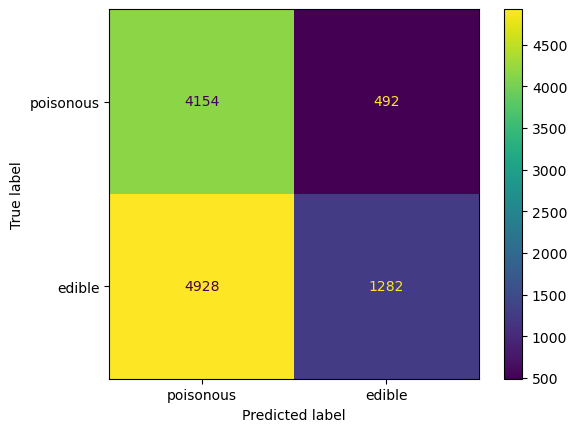

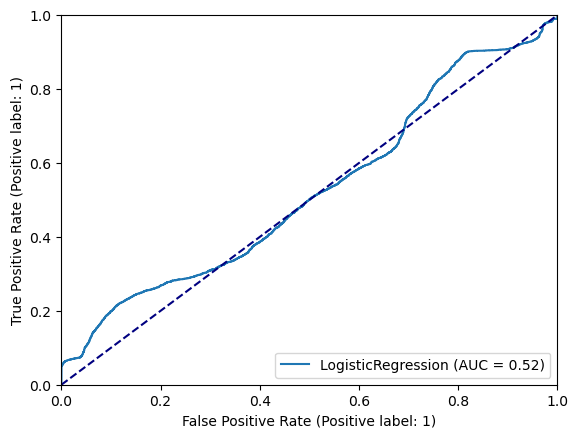

LogisticRegression(solver='liblinear')
Accuracy with transformed data:  0.4679439941046426
Precision with transformed data:  0.5771692745376956
Recall with transformed data:  0.2613526570048309
F1 score with transformed data:  0.35978718687652406


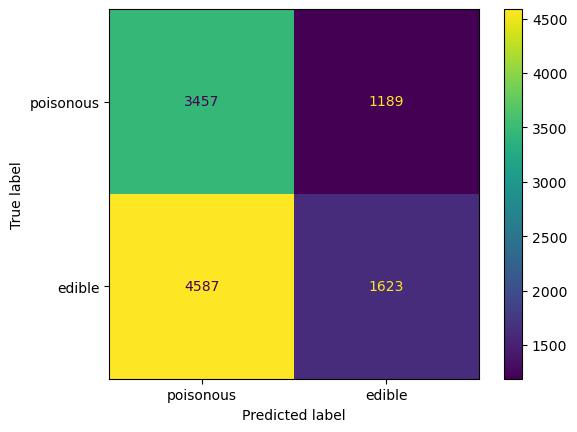

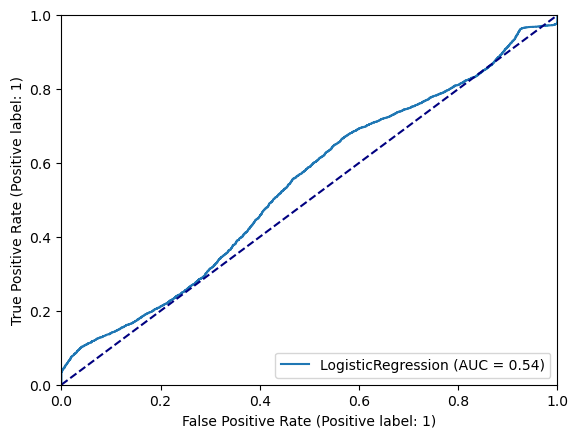

In [35]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver = 'liblinear')
report_classifier_performance(clf,tf_aug_train_features,tf_aug_test_features,train_labels,test_labels)
report_classifier_performance(clf,trim_train_features,trim_test_features,train_labels,test_labels)


# 7. Dimensionality Reduction using PCA



In [36]:
# PCA: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA
dim_red_pca = PCA(n_components = 62, random_state = 42)
pca_train_features = dim_red_pca.fit_transform(tf_aug_train_features)
pca_test_features = dim_red_pca.transform(tf_aug_test_features)

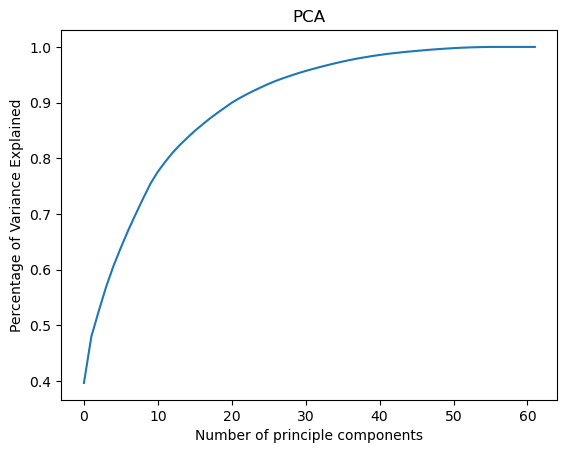

In [37]:
percentage_of_variance = np.cumsum(np.sort(dim_red_pca.explained_variance_ratio_)[::-1])
plt.plot(percentage_of_variance)
plt.ylabel("Percentage of Variance Explained")
plt.xlabel("Number of principle components")
plt.title("PCA")
plt.show()

In [38]:
"""
from sklearn.decomposition import SparsePCA
dim_red_pca = SparsePCA(n_components = 10, random_state = 42)
pca_train_features = dim_red_pca.fit_transform(tf_aug_train_features)
pca_test_features = dim_red_pca.transform(tf_aug_test_features)
"""

'\nfrom sklearn.decomposition import SparsePCA\ndim_red_pca = SparsePCA(n_components = 10, random_state = 42)\npca_train_features = dim_red_pca.fit_transform(tf_aug_train_features)\npca_test_features = dim_red_pca.transform(tf_aug_test_features)\n'

In [39]:
"""
percentage_of_variance = np.cumsum(np.sort(dim_red_pca.explained_variance_ratio_)[::-1])
plt.plot(percentage_of_variance)
plt.ylabel("Percentage of Variance Explained")
plt.xlabel("Number of principle components")
plt.title("PCA")
plt.show()
"""

'\npercentage_of_variance = np.cumsum(np.sort(dim_red_pca.explained_variance_ratio_)[::-1])\nplt.plot(percentage_of_variance)\nplt.ylabel("Percentage of Variance Explained")\nplt.xlabel("Number of principle components")\nplt.title("PCA")\nplt.show()\n'

In [40]:
"""
from sklearn.decomposition import TruncatedSVD
dim_red_svd = TruncatedSVD(n_components = 62, random_state = 42)
svd_train_features = dim_red_svd.fit_transform(tf_aug_train_features)
svd_test_features = dim_red_pca.transform(tf_aug_test_features)
"""

'\nfrom sklearn.decomposition import TruncatedSVD\ndim_red_svd = TruncatedSVD(n_components = 62, random_state = 42)\nsvd_train_features = dim_red_svd.fit_transform(tf_aug_train_features)\nsvd_test_features = dim_red_pca.transform(tf_aug_test_features)\n'

In [41]:
"""
percentage_of_variance = np.cumsum(np.sort(dim_red_svd.explained_variance_ratio_)[::-1])
plt.plot(percentage_of_variance)
plt.ylabel("Percentage of Variance Explained")
plt.xlabel("Number of principle components")
plt.title("TruncatedSVD")
plt.show()
"""

'\npercentage_of_variance = np.cumsum(np.sort(dim_red_svd.explained_variance_ratio_)[::-1])\nplt.plot(percentage_of_variance)\nplt.ylabel("Percentage of Variance Explained")\nplt.xlabel("Number of principle components")\nplt.title("TruncatedSVD")\nplt.show()\n'

# 8. Experiment with any 2 other models (Non-Ensemble)

In [42]:
from sklearn.decomposition import PCA
dim_red_pca = PCA(n_components = 10, random_state = 42)
pca_train_features = dim_red_pca.fit_transform(tf_aug_train_features)
pca_test_features = dim_red_pca.transform(tf_aug_test_features)

LogisticRegression(solver='liblinear')
Accuracy with transformed data:  0.5007369196757553
Precision with transformed data:  0.7226606538895152
Recall with transformed data:  0.2064412238325282
F1 score with transformed data:  0.3211422845691383


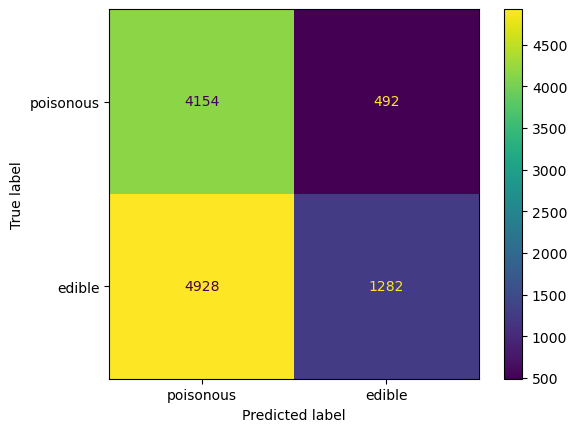

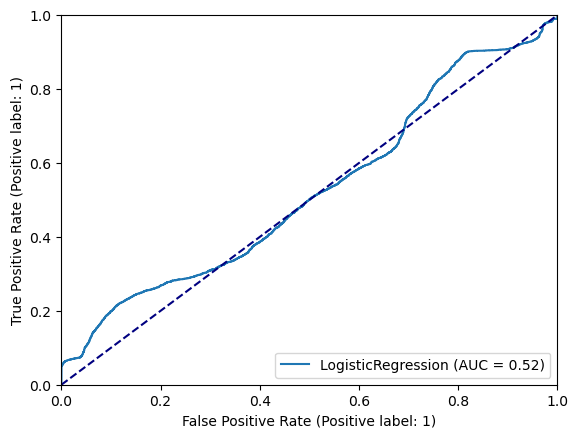

In [43]:
svm = SVC(kernel = "rbf", C = 100)
#report_classifier_performance(svm,pca_train_features,pca_test_features,train_labels,test_labels)
report_classifier_performance(clf,tf_aug_train_features,tf_aug_test_features,train_labels,test_labels)

LogisticRegression(penalty='l1', solver='liblinear')
Accuracy with transformed data:  0.5000921149594694
Precision with transformed data:  0.7208121827411168
Recall with transformed data:  0.20579710144927535
F1 score with transformed data:  0.3201803833145434


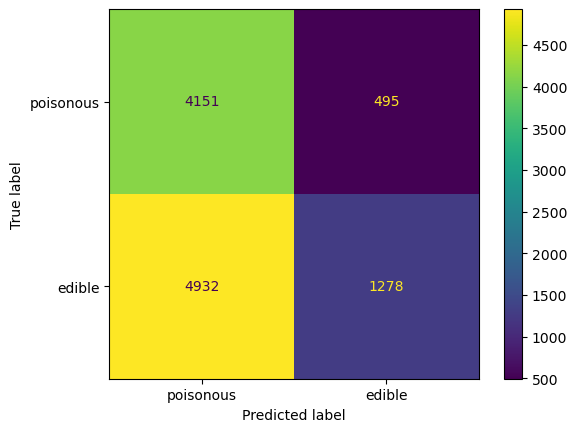

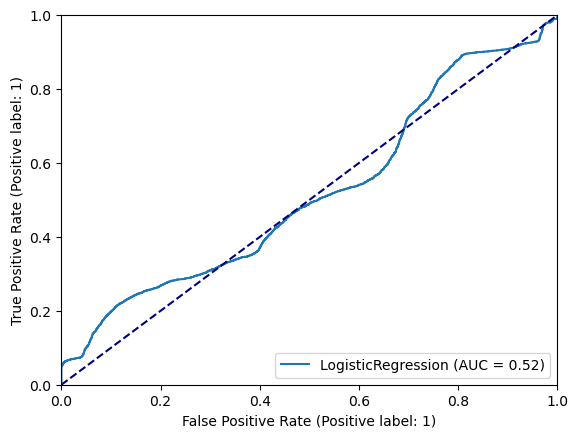

In [44]:
log_reg = LogisticRegression(penalty = "l1", solver = "liblinear" )
report_classifier_performance(log_reg,tf_aug_train_features,tf_aug_test_features,train_labels,test_labels)

DecisionTreeClassifier()
Accuracy with transformed data:  0.5267133382461312
Precision with transformed data:  0.6859819569743234
Recall with transformed data:  0.3183574879227053
F1 score with transformed data:  0.43488781346238453


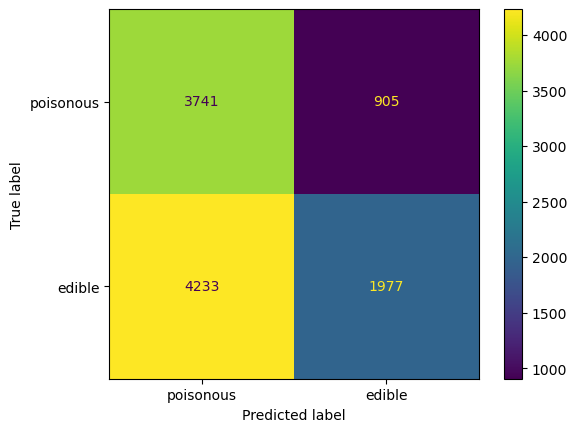

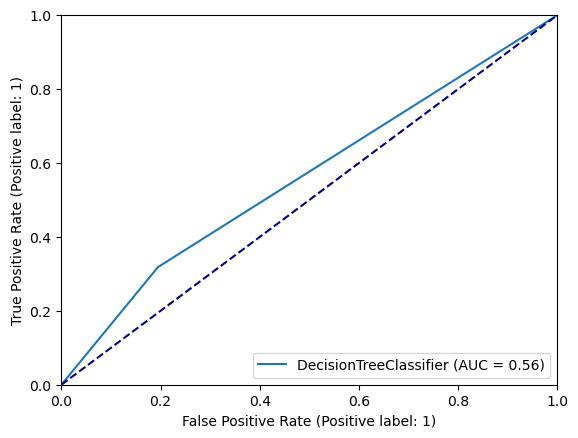

In [45]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier()
report_classifier_performance(clf_tree,tf_aug_train_features,tf_aug_test_features,train_labels,test_labels)

KNeighborsClassifier()
Accuracy with transformed data:  0.5502947678703022
Precision with transformed data:  0.7222222222222222
Recall with transformed data:  0.3475040257648953
F1 score with transformed data:  0.46923244183518154


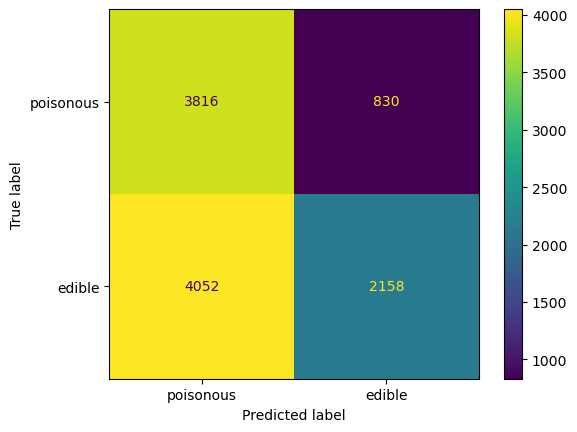

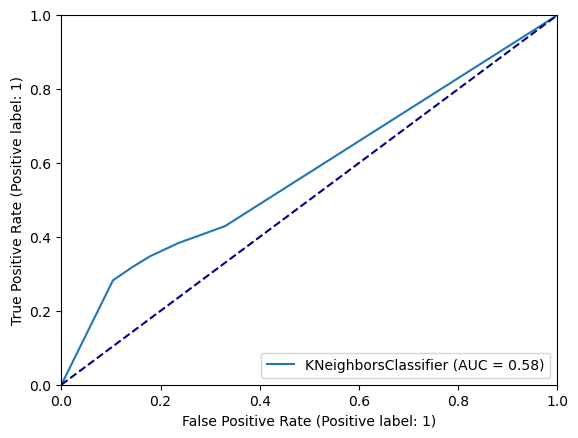

In [46]:
# Models: https://scikit-learn.org/stable/supervised_learning.html
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier()
report_classifier_performance(clf_knn,tf_aug_train_features,tf_aug_test_features,train_labels,test_labels)

# 9. Experiment with 1 Ensemble Method

RandomForestClassifier(random_state=42)
Accuracy with transformed data:  0.5631908621960207
Precision with transformed data:  0.8131399317406144
Recall with transformed data:  0.3069243156199678
F1 score with transformed data:  0.44563946691606265


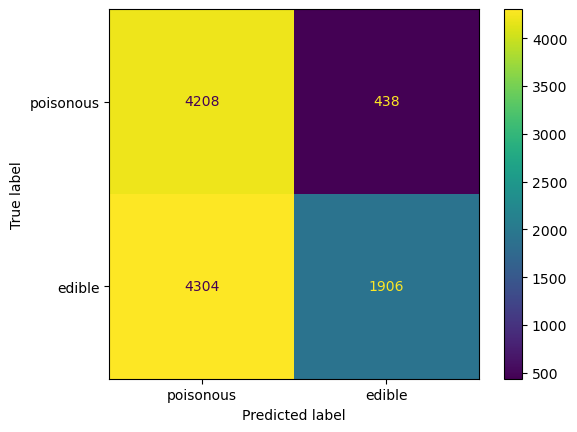

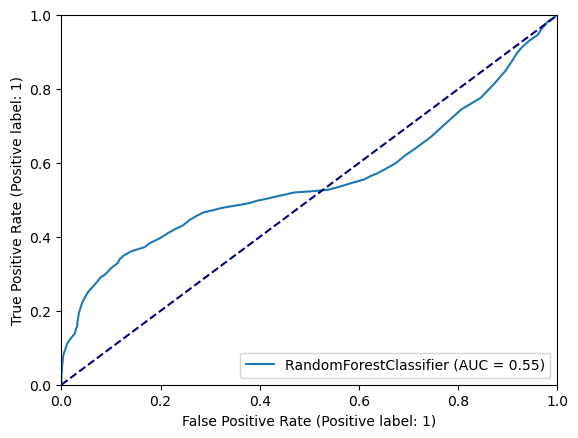

RandomForestClassifier(random_state=42)
Accuracy with transformed data:  0.6018791451731761
Precision with transformed data:  0.7687927107061503
Recall with transformed data:  0.43478260869565216
F1 score with transformed data:  0.5554412672289653


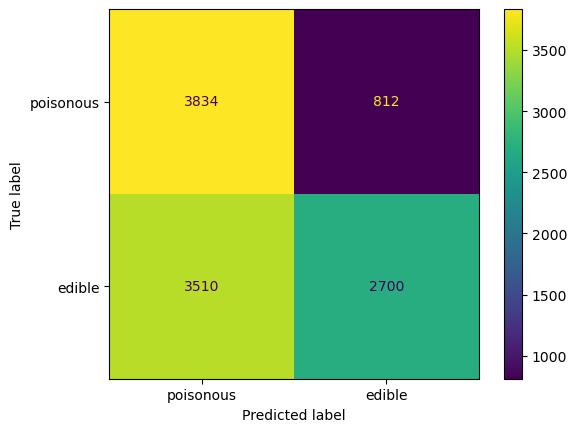

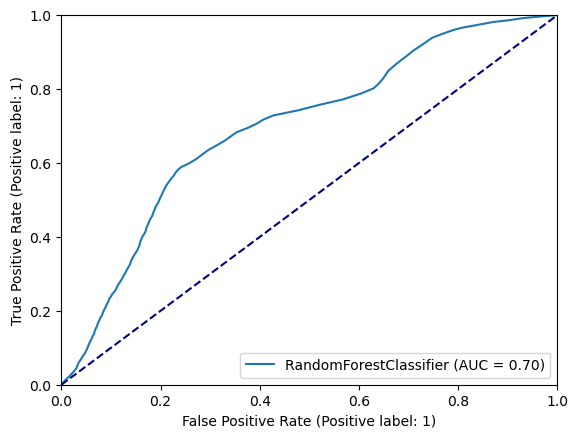

In [47]:
# Ensemble Methods: https://scikit-learn.org/stable/modules/ensemble.html
from sklearn.ensemble import RandomForestClassifier
clf_random_forest = RandomForestClassifier(random_state= 42)
report_classifier_performance(clf_random_forest,tf_aug_train_features,tf_aug_test_features,train_labels,test_labels)
report_classifier_performance(clf_random_forest,trim_train_features,trim_test_features,train_labels,test_labels)

GradientBoostingClassifier(random_state=42)
Accuracy with transformed data:  0.5402542372881356
Precision with transformed data:  0.8457175269427113
Recall with transformed data:  0.2400966183574879
F1 score with transformed data:  0.37401229148375764


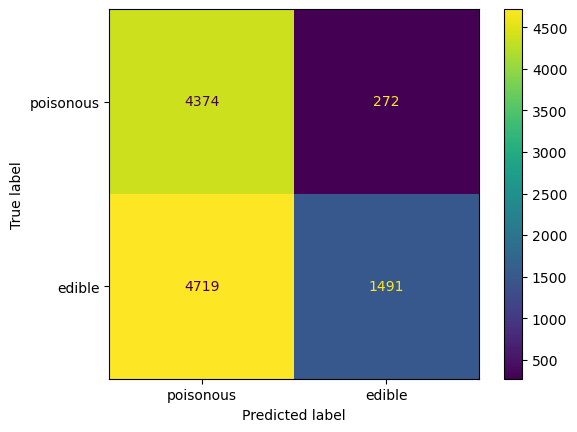

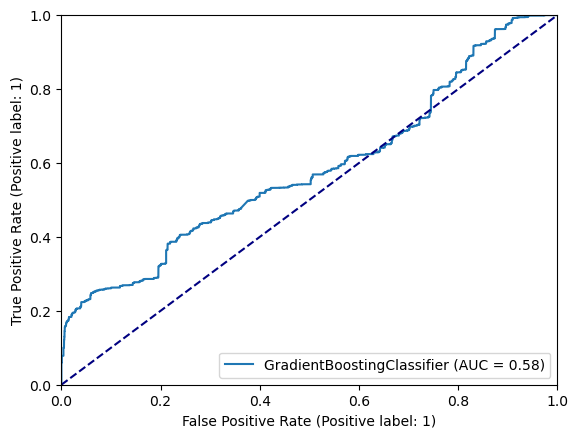

GradientBoostingClassifier(random_state=42)
Accuracy with transformed data:  0.5292004421518055
Precision with transformed data:  0.6387275940419086
Recall with transformed data:  0.4074074074074074
F1 score with transformed data:  0.49749287189066954


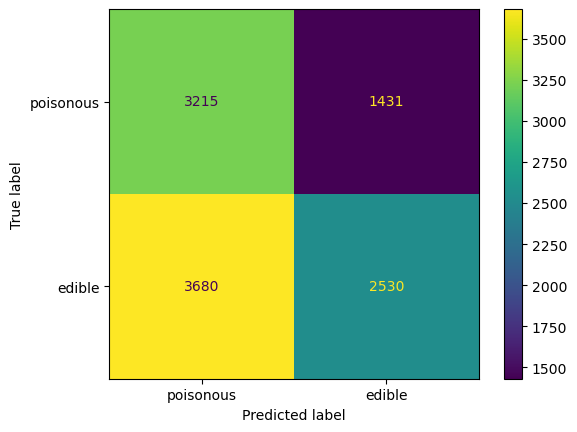

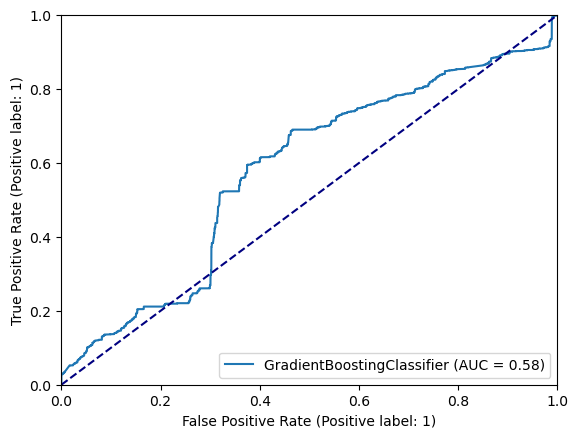

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gb = GradientBoostingClassifier(random_state=42)
report_classifier_performance(clf_gb,tf_aug_train_features,tf_aug_test_features,train_labels,test_labels)
report_classifier_performance(clf_gb,trim_train_features,trim_test_features,train_labels,test_labels)

AdaBoostClassifier(random_state=42)
Accuracy with transformed data:  0.5049742078113486
Precision with transformed data:  0.7380410022779044
Recall with transformed data:  0.20869565217391303
F1 score with transformed data:  0.3253828772282199


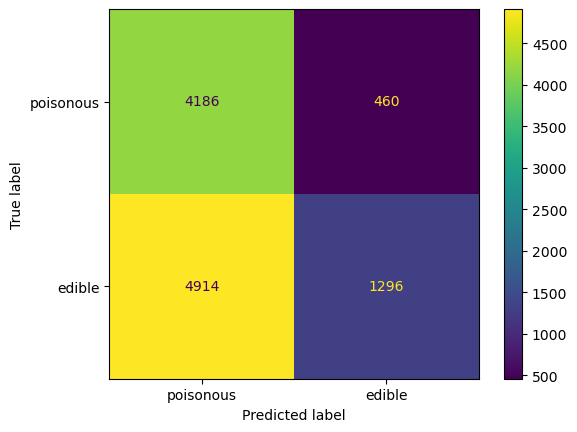

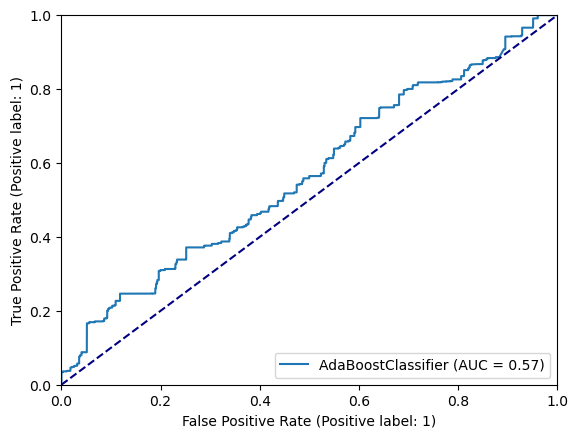

AdaBoostClassifier(random_state=42)
Accuracy with transformed data:  0.6065770081061165
Precision with transformed data:  0.7533315913247975
Recall with transformed data:  0.4642512077294686
F1 score with transformed data:  0.5744744445551461


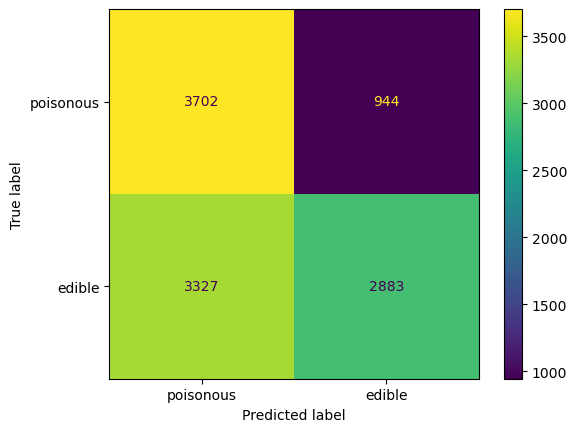

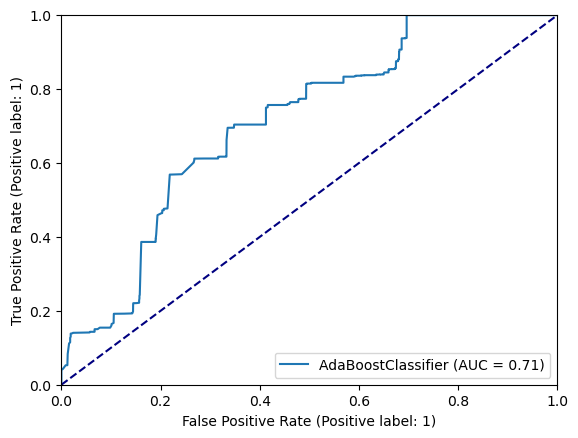

In [49]:
from sklearn.ensemble import AdaBoostClassifier
clf_ab = AdaBoostClassifier(random_state=42)
report_classifier_performance(clf_ab,tf_aug_train_features,tf_aug_test_features,train_labels,test_labels)
report_classifier_performance(clf_ab,trim_train_features,trim_test_features,train_labels,test_labels)

# 10. Cross-Validation & Hyperparameter Tuning for All 3 Models

In [50]:
# Cross-Validation: https://scikit-learn.org/stable/modules/cross_validation.html
# Hyperparameter Tuning: https://scikit-learn.org/stable/modules/grid_search.html
train_data = tf_aug_train_features.copy()
test_data = tf_aug_test_features.copy()
train_label = train_labels.copy()
test_label = test_labels.copy()
with open('data.npy', 'wb') as f:
    np.save(f, train_data)
    np.save(f, test_data)
    np.save(f, train_label)
    np.save(f, test_label)

In [51]:
import numpy as np
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
with open('data.npy', 'rb') as f:
    train_data = np.load(f)
    test_data = np.load(f)
    train_label = np.load(f)
    test_label = np.load(f)

In [52]:
clf1 = DecisionTreeClassifier(random_state=42)
clf2 = LogisticRegression(random_state=42)
clf3 = RandomForestClassifier(random_state=42)

In [53]:

#Decision Tree
param1 = {}
param1['classifier__criterion'] = ["gini","entropy"]
param1['classifier__splitter'] = ["best","random"]
param1['classifier__max_depth'] = [3,5,10,15,20,40]
param1['classifier__min_samples_split'] = [2,5,7,10]
param1['classifier__min_samples_leaf'] = [5,20]
param1['classifier__max_leaf_nodes'] = [5,10,100,200]
param1['classifier__min_impurity_decrease'] = [0,0.001,0.001]
#param1['classifier__class_weight'] = ["balanced","balanced_subsample",None]
param1['classifier__ccp_alpha'] = [0,0.001,0.01]
param1['classifier'] = [clf1]

#Logistic Regression
param2 = {}
param2['classifier__penalty'] = ['l1','l2']
param2['classifier__C'] = [1e-3,1e-2,1e-1,1e-0,1e1,1e2,1e3,1e4,1e5,1e6,1e7]
param2['classifier__max_iter'] = [100000]
param2['classifier__solver'] = ["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"]
param2['classifier'] = [clf2]

#Random Forest

param3 = {}
param3['classifier__n_estimators'] = [100,200]
param3['classifier__criterion'] = ["gini","entropy"]
param3['classifier__max_depth'] = [3,5,10,15,20,40]
param3['classifier__min_samples_split'] = [2,5,7,10]
param3['classifier__min_samples_leaf'] = [5,20]
#param3['classifier__max_features'] = ["sqrt","log2",None]
param3['classifier__max_leaf_nodes'] = [5,10,100,200]
param3['classifier__min_impurity_decrease'] = [0,0.0001,0.001]
param3['classifier__n_jobs'] = [-1]
param3['classifier__warm_start'] = [True,False]
#param3['classifier__class_weight'] = ["balanced","balanced_subsample",None]
param1['classifier__ccp_alpha'] = [0,0.001,0.01]
param3['classifier'] = [clf3]


In [54]:
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
import joblib

In [55]:
kfold = model_selection.KFold(n_splits = 10, random_state = 42, shuffle = True)
pipeline = Pipeline([('classifier', clf1)])

grid_search = GridSearchCV(pipeline, cv= kfold, n_jobs=-1, param_grid=param1, scoring='f1',verbose=10)
grid_search.fit(train_data, train_label)

#save your model or results
joblib.dump(grid_search, 'tree.pkl')

#load your model for further usage
joblib.load("tree.pkl")


Fitting 10 folds for each of 6912 candidates, totalling 69120 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('classifier',
                                        DecisionTreeClassifier(ccp_alpha=0,
                                                               criterion='entropy',
                                                               max_depth=40,
                                                               max_leaf_nodes=200,
                                                               min_impurity_decrease=0,
                                                               min_samples_leaf=5,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier': [DecisionTreeClassifier(ccp_alpha=0,
                                                               criterion='entropy',
                                                               max_d...
                         'classifier__ccp_alpha'

In [56]:
#Logistic
kfold = model_selection.KFold(n_splits = 10, random_state = 42, shuffle = True)
pipeline = Pipeline([('classifier', clf2)])

grid_search = GridSearchCV(pipeline, cv= kfold, n_jobs=-1, param_grid=param2, scoring='f1',verbose=10)
grid_search.fit(train_data, train_label)

#save your model or results
joblib.dump(grid_search, 'logistic.pkl')

#load your model for further usage
joblib.load("logistic.pkl")

Fitting 10 folds for each of 132 candidates, totalling 1320 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('classifier',
                                        LogisticRegression(C=0.1,
                                                           max_iter=100000,
                                                           penalty='l1',
                                                           random_state=42,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'classifier': [LogisticRegression(C=0.1,
                                                           max_iter=100000,
                                                           penalty='l1',
                                                           random_state=42,
                                                           solver='liblinear')],
                         'classifier__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                              

In [57]:
kfold = model_selection.KFold(n_splits = 10, random_state = 42, shuffle = True)
pipeline = Pipeline([('classifier', clf3)])

grid_search = GridSearchCV(pipeline, cv= kfold, n_jobs=-1, param_grid=param3, scoring='f1',verbose=10)
grid_search.fit(train_data, train_label)

#save your model or results
joblib.dump(grid_search, 'forest.pkl')

#load your model for further usage
joblib.load("forest.pkl")

Fitting 10 folds for each of 4608 candidates, totalling 46080 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(criterion='entropy',
                                                               max_depth=40,
                                                               max_leaf_nodes=200,
                                                               min_impurity_decrease=0,
                                                               min_samples_leaf=5,
                                                               n_estimators=200,
                                                               n_jobs=-1,
                                                               random_state=42,
                                                               warm_start=True))]),
             n_jobs=-1,
             param_grid={'classifier': [RandomForestClassifier(criter...
                         'classifier__criterion'

In [58]:
# Compute all at once for quicker computation

kfold = model_selection.KFold(n_splits = 10, random_state = 42, shuffle = True)
pipeline = Pipeline([('classifier', clf1)])
params = [param1,param2,param3]
grid_search = GridSearchCV(pipeline, cv= kfold, n_jobs=-1, param_grid=params, scoring='f1',verbose=10)
grid_search.fit(train_data, train_label)

#save your model or results
joblib.dump(grid_search, 'all.pkl')

#load your model for further usage
joblib.load("all.pkl")


Fitting 10 folds for each of 11652 candidates, totalling 116520 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('classifier',
                                        DecisionTreeClassifier(ccp_alpha=0,
                                                               criterion='entropy',
                                                               max_depth=40,
                                                               max_leaf_nodes=200,
                                                               min_impurity_decrease=0,
                                                               min_samples_leaf=5,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid=[{'classifier': [DecisionTreeClassifier(ccp_alpha=0,
                                                                criterion='entropy',
                                                                max_...
                          'classifier__criteri

# 11. Report Final Results 

In [59]:
# e.g. Accuracy, Precision etc.

Decision Tree with best param  {'classifier': DecisionTreeClassifier(ccp_alpha=0, criterion='entropy', max_depth=40,
                       max_leaf_nodes=200, min_impurity_decrease=0,
                       min_samples_leaf=5, random_state=42), 'classifier__ccp_alpha': 0, 'classifier__criterion': 'entropy', 'classifier__max_depth': 40, 'classifier__max_leaf_nodes': 200, 'classifier__min_impurity_decrease': 0, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 2, 'classifier__splitter': 'best'}
Best validation score:  0.9757545037741971
DecisionTreeClassifier(ccp_alpha=0, criterion='entropy', max_depth=40,
                       max_leaf_nodes=200, min_impurity_decrease=0,
                       min_samples_leaf=5, random_state=42)
Accuracy with transformed data:  0.9835500766733715
Precision with transformed data:  0.9784808322645004
Recall with transformed data:  0.9822135329741071
F1 score with transformed data:  0.9803436295273904


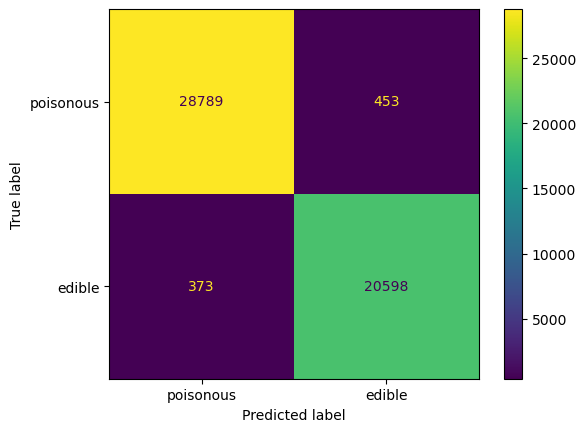

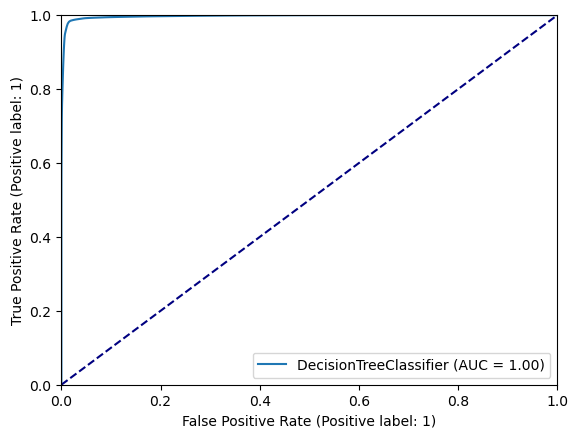

DecisionTreeClassifier(ccp_alpha=0, criterion='entropy', max_depth=40,
                       max_leaf_nodes=200, min_impurity_decrease=0,
                       min_samples_leaf=5, random_state=42)
Accuracy with transformed data:  0.5543478260869565
Precision with transformed data:  0.7323848238482384
Recall with transformed data:  0.34814814814814815
F1 score with transformed data:  0.4719493560358


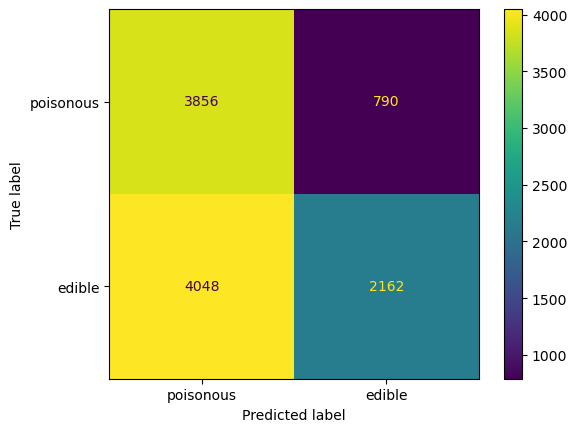

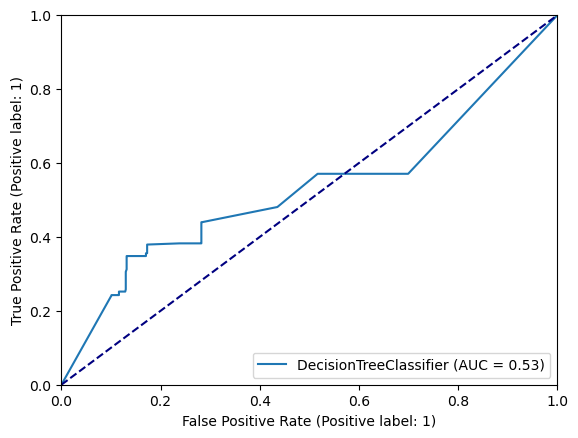

In [63]:
#Tree best performance
gs = joblib.load("tree.pkl")
print("Decision Tree with best param ", gs.best_params_)
print("Best validation score: ", gs.best_score_)

# PERFORMANCE ON TRAINING DATASET
best_clf = gs.best_params_["classifier"]
report_classifier_performance(best_clf,train_data,train_data,train_labels,train_labels)
# PERFORMANCE ON TEST DATASET
report_classifier_performance(best_clf,train_data,test_data,train_labels,test_labels)


Logistic Regression with best param  {'classifier': LogisticRegression(C=0.1, max_iter=100000, penalty='l1', random_state=42,
                   solver='liblinear'), 'classifier__C': 0.1, 'classifier__max_iter': 100000, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best validation score:  0.6844613893609336
LogisticRegression(C=0.1, max_iter=100000, penalty='l1', random_state=42,
                   solver='liblinear')
Accuracy with transformed data:  0.744807121661721
Precision with transformed data:  0.7066214093925731
Recall with transformed data:  0.6651089599923704
F1 score with transformed data:  0.6852370424957014


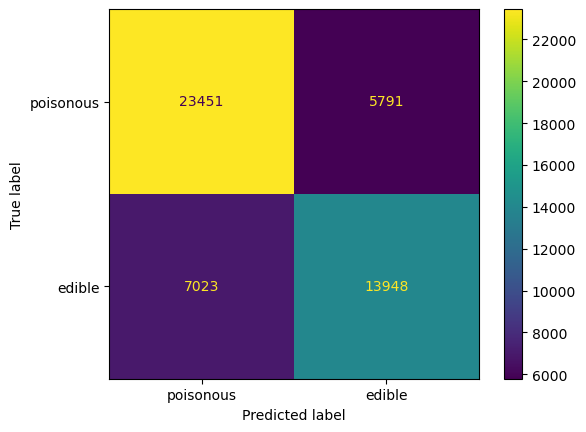

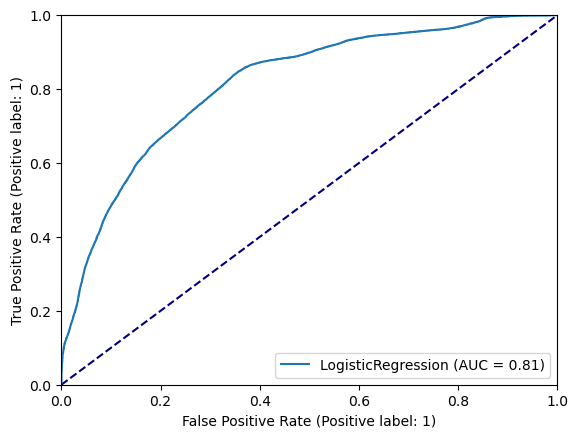

LogisticRegression(C=0.1, max_iter=100000, penalty='l1', random_state=42,
                   solver='liblinear')
Accuracy with transformed data:  0.5082903463522476
Precision with transformed data:  0.75
Recall with transformed data:  0.2106280193236715
F1 score with transformed data:  0.3288911239627861


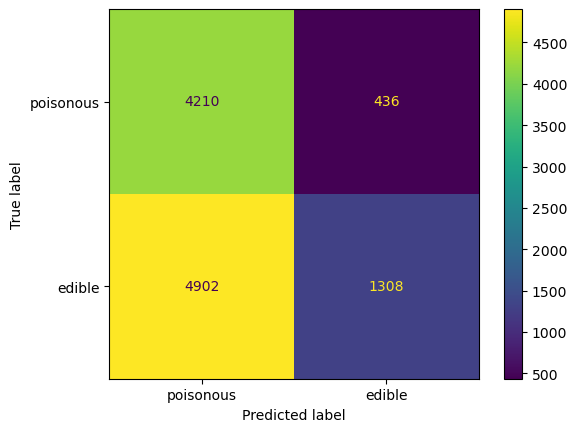

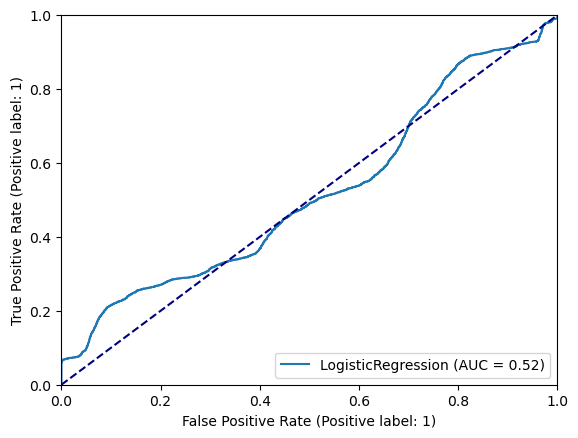

In [64]:
#Tree best performance
gs = joblib.load("logistic.pkl")
print("Logistic Regression with best param ", gs.best_params_)
print("Best validation score: ", gs.best_score_)

# PERFORMANCE ON TRAINING DATASET
best_clf = gs.best_params_["classifier"]
report_classifier_performance(best_clf,train_data,train_data,train_labels,train_labels)
# PERFORMANCE ON TEST DATASET
report_classifier_performance(best_clf,train_data,test_data,train_labels,test_labels)

Random Forest with best param  {'classifier': RandomForestClassifier(criterion='entropy', max_depth=40, max_leaf_nodes=200,
                       min_impurity_decrease=0, min_samples_leaf=5,
                       n_estimators=200, n_jobs=-1, random_state=42,
                       warm_start=True), 'classifier__criterion': 'entropy', 'classifier__max_depth': 40, 'classifier__max_leaf_nodes': 200, 'classifier__min_impurity_decrease': 0, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200, 'classifier__n_jobs': -1, 'classifier__warm_start': True}
Best validation score:  0.9788966442483258
RandomForestClassifier(criterion='entropy', max_depth=40, max_leaf_nodes=200,
                       min_impurity_decrease=0, min_samples_leaf=5,
                       n_estimators=200, n_jobs=-1, random_state=42,
                       warm_start=True)
Accuracy with transformed data:  0.9846454105510525
Precision with transformed data:  0.9846914291

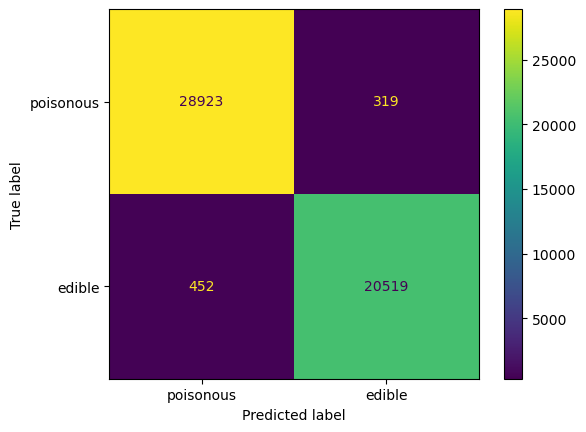

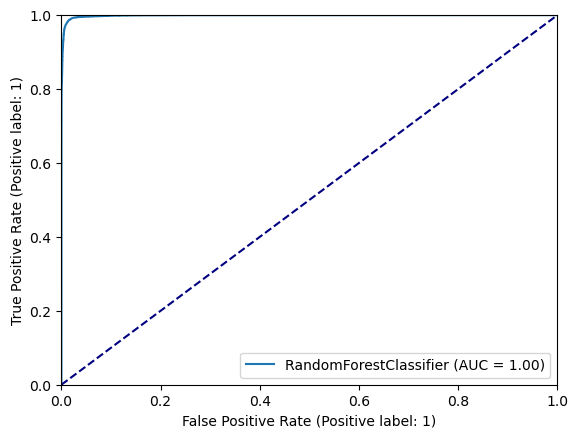

RandomForestClassifier(criterion='entropy', max_depth=40, max_leaf_nodes=200,
                       min_impurity_decrease=0, min_samples_leaf=5,
                       n_estimators=200, n_jobs=-1, random_state=42,
                       warm_start=True)
Accuracy with transformed data:  0.5681650700073692
Precision with transformed data:  0.8859026369168357
Recall with transformed data:  0.28132045088566826
F1 score with transformed data:  0.4270349547787827


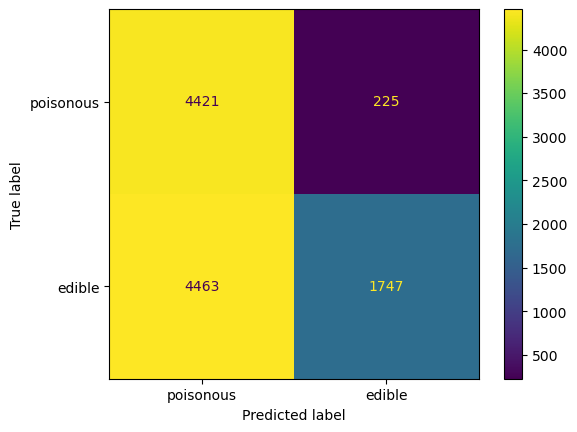

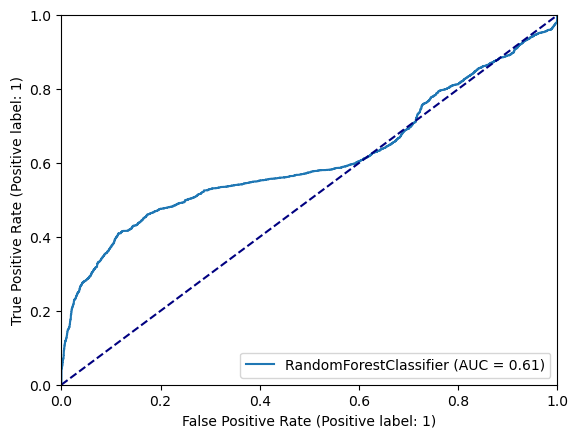

In [65]:
#Tree best performance
gs = joblib.load("forest.pkl")
print("Random Forest with best param ", gs.best_params_)
print("Best validation score: ", gs.best_score_)

# PERFORMANCE ON TRAINING DATASET
best_clf = gs.best_params_["classifier"]
report_classifier_performance(best_clf,train_data,train_data,train_labels,train_labels)
# PERFORMANCE ON TEST DATASET
report_classifier_performance(best_clf,train_data,test_data,train_labels,test_labels)